In [101]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

In [102]:
traj = xr.open_dataset("/home/kbrennan/balloon_optimizer/lagranto/trajectory.4")

In [103]:
traj = traj.squeeze()
traj
# fix time (time is now in hours.minutes, convert to decimal hours)
time = traj.time.values
hours = np.floor(time)
minutes = (time - hours) * 100
decimal_time = hours + minutes / 60
traj['time'] = decimal_time

# terminate trajectory that reaches the ground (p > 910 hPa)
if np.any(traj.p > 910):
    landing_index = np.where(traj.p > 910)[0]
    traj = traj.isel(time=slice(0, landing_index[0]))

Text(0.5, 0, 'time after launch (h)')

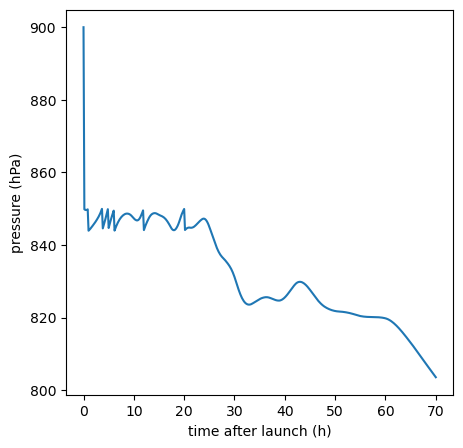

In [104]:
fig, ax = plt.subplots(1, 1, figsize=(5,5))
ax.plot(traj.time, traj.p)
ax.set_ylabel('pressure (hPa)')
ax.set_xlabel('time after launch (h)')


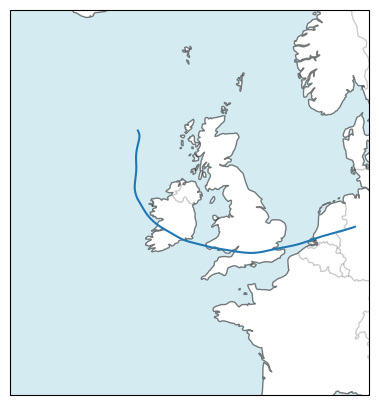

In [105]:
projection_center = (traj.lon.mean().values, traj.lat.mean().values)
lat_extent = 10
lon_extent = 13
projection = ccrs.RotatedPole(pole_longitude=projection_center[0]-180, pole_latitude=90-projection_center[1])
fig, ax = plt.subplots(1, 1, figsize=(5,5), subplot_kw={'projection': projection})
ax.coastlines(alpha=0.5)
ax.add_feature(ccrs.cartopy.feature.OCEAN, facecolor='lightblue',alpha=0.5)
ax.add_feature(ccrs.cartopy.feature.BORDERS, alpha=0.2)

ax.plot(traj.lon, traj.lat, transform=ccrs.PlateCarree())
# set extent to 10 degrees around the projection center
ax.set_extent([projection_center[0]-lon_extent, projection_center[0]+lon_extent, projection_center[1]-lat_extent, projection_center[1]+lat_extent], crs=ccrs.PlateCarree())